In [2]:
import numpy as np
import cv2 as cv
from PIL import Image

In [35]:
blank_image=np.zeros((200,1000,3),dtype="uint8")

In [36]:
x1=0
y1=blank_image.shape[0]//2
x2=blank_image.shape[1]
y2=blank_image.shape[0]//2
cv.line(blank_image,(x1,y1),(x2,y2),(255,255,255),thickness=1)
x1=blank_image.shape[1]//8
y1=0
x2=blank_image.shape[1]//8
y2=blank_image.shape[1]
cv.line(blank_image,(x1,y1),(x2,y2),(255,255,255),thickness=1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(200, 1000, 3), dtype=uint8)

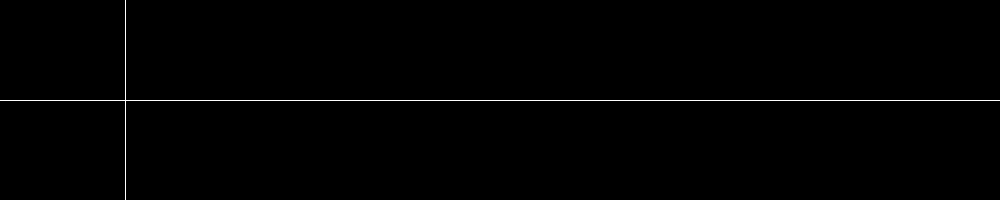

In [37]:
Image.fromarray(blank_image)

In [67]:
import pyaudio 
import wave
Frame_Per_Buffer=16
Format=pyaudio.paInt16
Channel=1
Rate=1600
p=pyaudio.PyAudio()
stream=p.open(
    format=Format,
    channels=Channel,
    rate=Rate,
    input=True,
    frames_per_buffer=Frame_Per_Buffer
)
while 1:
    data=np.frombuffer(stream.read(Frame_Per_Buffer),dtype="int16")
    print(np.average(data))

-9.4375
-2.5
8.125
-4.5
1.375
-10.1875
15.125
-8.875
1.875
1.75
3.1875
1.5625
-5.8125
-6.1875
7.8125
-3.4375
6.8125
-5.8125
-3.9375
-2.875
-3.0625
0.6875
7.0625
-5.25
0.5
0.1875
6.0
1.0625
9.4375
-17.0
-2.4375
1.6875
11.8125
-11.125
0.625
-5.8125
7.8125
6.625
-1.3125
-5.625
-0.8125
0.4375
6.6875
-1.5625
-6.4375
-1.4375
1.4375
-4.1875
0.875
3.4375
9.75
-4.875
-3.0625
-8.9375
5.9375
-2.375
8.0
2.5625
2.3125
-8.3125
5.125
1.9375
-3.625
-4.1875
-1.375
10.5625
-0.125
-5.125
-1.5625
0.3125
0.1875
0.4375
3.8125
2.6875
-3.75
8.375
-16.0625
-3.375
-4.4375
16.75
1.0625
4.8125
-7.6875
-0.9375
-0.875
2.0625
13.125
-10.0
-2.5
-2.5
-2.5
10.5
-9.625
8.6875
-5.0625
3.4375
-2.0
-4.875
8.6875
-8.625
5.0625
0.5
-3.25
6.0
-6.75
0.75
6.0
-1.25
-0.375
-4.0625
-3.5
12.0
-9.0
-2.4375
3.8125
2.0
11.0625
-12.75
11.5
-12.375
0.0625
-1.0
-1.1875
2.875
3.5
0.25
-0.125
-1.6875
-5.5625
6.25
2.0
-0.875
0.75
0.9375
-12.5
6.875
1.1875
-0.875
2.1875
-2.9375
2.625
0.75
0.875
7.375
-17.375
8.3125
6.625
2.125
-10.1875
6.25

KeyboardInterrupt: 

In [54]:
import numpy as np
import pyaudio
import cv2 as cv
from PIL import Image, ImageTk

# Audio setup
RATE = 1600
CHUNK = 400
FORMAT = pyaudio.paInt16
CHANNELS = 1

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

# Canvas settings
height, width = 200, 1000
mid_y = height // 2

# Create blank image with midline
def create_blank_canvas():
    img = np.zeros((height, width, 3), dtype="uint8")
    cv.line(img, (0, mid_y), (width, mid_y), (255, 255, 255), 1)
    return img

def get_audio_waveform_line(data, color=(0, 255, 0)):
    img = create_blank_canvas()
    samples = np.frombuffer(data, dtype=np.int16)
    samples = samples / 32768.0  # Normalize between -1 to 1
    samples = (samples * (height // 2)).astype(np.int32)

    step = width // len(samples)  # how much space between each sample
    for i in range(1, len(samples)):
        x1 = (i - 1) * step
        y1 = mid_y - samples[i - 1]
        x2 = i * step
        y2 = mid_y - samples[i]
        cv.line(img, (x1, y1), (x2, y2), color, 1)
    
    return img

# Example: Draw once
data = stream.read(CHUNK)
waveform_img = get_audio_waveform_line(data)
Image.fromarray(waveform_img).show()
